<a href="https://colab.research.google.com/github/rvalienter90/UCF/blob/master/CAP-5610_MACHINE%20LEARNING/HW1/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***RODOLFO VALIENTE ROMERO***

#**HW 1**

** *Code is based on course notes and was used code from the Colab examples**

This homework will get you up to speed with Python programming, numpy, matplotlib, Keras, gradients, partial derivatives, git, GitHub, Google's colaboratory etc. Have fun!

For this homework, you will create neural networks with an input layer and an output layer without any hidden layers. The connections are dense: each input neuron is connected to each output neuron.

Instructions for problems 1 and 2:
- Load the training and test data using Keras, no validation set needed.
- Train 10 classifiers that perform binary classification: *Is the input image the digit i or is it a digit different from i?* Each of the ten classifiers has an input layer consisting of 28 x 28 input neurons and an output layer consisting of a single output neuron.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.
- Use ```argmax``` to determine the classifier with the strongest output and declare the corresponding digit as output.


** Problem 1,2 and 3**

1.   Run the section Loading the MNIST digits data set, and implement functions for P1,P2,P3
2.   Run the Ploblemx Final Solution 


** Problem 4 and 5**

1.   Run the section Loading the MNIST digits data set, and implement functions for P4,P5
2.   Run the Ploblemx Final Solution

Extra exploration is done in the other sections

## Loading the MNIST digits data set, and implement functions for P1,P2,P3




In [0]:
# Load the training and test data using Keras, no validation set needed.
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()



In [0]:
#functions
# ome hot encode
def my_own_categorical (train_labels_original):
  Y = np.zeros((train_labels_original.shape[0], 10))
  Y[np.arange(train_labels_original.shape[0]),train_labels_original] = 1
  return Y

#sigmoid
def sigmoid(z):
  return 1/(1+np.exp(-z))

#softmax in a numerically-safe way.  https://www.deeplearningbook.org/contents/numerical.html
def softmax_safe(X):
    exps = np.exp(X - np.max(X,axis=1, keepdims= True))
    total= np.sum(exps, axis = 1, keepdims= True)
    return exps / total

#basic softmax
def softmax(z):
  return np.exp(z)/np.sum(np.exp(z), axis = 1, keepdims= True)

#gradient
def sigmoid_grad (x):    
  da = sigmoid(x)*(1-sigmoid(x))
  return da

#forward propagation
def forward(X,W):
  Z = np.dot(X, W)
  return Z
def forward_sigmoid(X,W):
  Z = np.dot(X, W)
  Y = sigmoid(Z)
  return Y
def forward_softmax(X,W):
  Z = np.dot(X, W)
  Y = softmax_safe(Z)
  return Y

def sigmoid_predict(X,W):
  Z=forward(X,W)
  return 1/(1+np.exp(-Z))
def softmax_output(Z):
  return softmax_safe(Z)
def sigmoid_output(Z):
  return sigmoid(Z)

#Loss binary cross entropy
def ce_loss(Y,A):
  loss = - np.sum(Y*np.log(A)+(1-Y)*np.log(1 - A))/Y.shape[0]
  return loss
#Loss square error
def se_loss (Y,A):
  loss = 1/2*np.sum((Y-A)*(Y-A))/Y.shape[0]
  return loss
#Loss categorical cross entropy
def cc_loss (Y,A): 
  loss = - np.sum(Y*np.log(A))/Y.shape[0]
  return loss

#Load the data, pre-process and add bias
def load_data():
  (train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
  train_images = train_images_original.reshape(train_images_original.shape[0], -1)/255
  #train_images = train_images.astype('float32') / 255

  test_images = test_images_original.reshape(test_images_original.shape[0], -1)/255
  #test_images = test_images.astype('float32') / 255
  
  train_images_b =  np.c_[np.ones((train_images.shape[0], 1)), train_images]
  test_images_b = np.c_[np.ones((test_images.shape[0], 1)), test_images]
  
  
  
  return train_images_b, train_labels_original, test_images_b, test_labels_original

#train square error 
def train_model_se(train_images_b, Y_train,lr,batch_size,epochs):
  print("train model se")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 1))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_pred = forward_sigmoid(X, W)   
      
      dZ = (1/batch_size)*y_pred*(1-y_pred)*(y_pred - Y) 
      dW = X.T.dot(dZ)
      W = W - lr*dW 
    
    #y_pred=forward_sigmoid(train_images_b, W) 
    #loss = se_loss(Y_train, y_pred)
    #print("Epoch ",epoch," Loss =", loss)
  y_pred=forward_sigmoid(train_images_b, W) 
  loss = se_loss(Y_train, y_pred)
  print("Epoch ",epoch," Loss =", loss)
  return W

#train binary cross entropy 
def train_model_ce(train_images_b, Y_train,lr,batch_size,epochs):
  print("train model ce")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 1))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_pred = forward_sigmoid(X, W)   
      
      dZ = (1/batch_size)*(y_pred - Y) 
      dW = X.T.dot(dZ) 
      W = W - lr*dW 
    
    #y_pred=forward_sigmoid(train_images_b, W) 
    #loss = ce_loss(Y_train, y_pred)
    #print("Epoch ",epoch," Loss =", loss)
  y_pred=forward_sigmoid(train_images_b, W) 
  loss = ce_loss(Y_train, y_pred)
  print("Epoch ",epoch," Loss =", loss)
  return W

#train categorical cross entropy
def train_model_cc(train_images_b, Y_train,lr,batch_size,epochs):
  print("train model cc")
  lr=lr
  batch_size=batch_size
  epochs=epochs
  W= np.zeros((train_images_b.shape[1], 10))
  m = train_images_b.shape[0]
  
  for epoch in range (0,epochs): 
    shuffled_indices = np.random.permutation(m)
    X_shuffled = train_images_b[shuffled_indices]
    y_shuffled = Y_train[shuffled_indices]
    
    for i in range(0, m, batch_size):    
      X = X_shuffled[i : i + batch_size]
      Y = y_shuffled[i : i + batch_size]  

      y_pred = forward_softmax(X, W)   
      
      dZ = (1/batch_size)*(y_pred - Y) 
      dW = X.T.dot(dZ) 

      W = W - lr*dW 
    
    y_pred=forward_softmax(train_images_b, W) 
    loss = cc_loss(Y_train, y_pred)
    print("Epoch ",epoch," Loss =", loss)
  y_pred=forward_softmax(train_images_b, W) 
  loss = cc_loss(Y_train, y_pred)
  print("Epoch ",epoch," Final Loss =", loss)
  return W

## Load and Explore data

### Exploring the format of the MNIST digits data set

In [10]:

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

print("train_images_original ",train_images_original.shape)
print("len train_images_original", len(train_images_original))
#print(train_images_original.ndim)
print("train_labels_original ",train_labels_original)
print("train_labels_original.shape ", train_labels_original.shape)

train_images_original  (60000, 28, 28)
len train_images_original 60000
train_labels_original  [5 0 4 ... 5 6 8]
train_labels_original.shape  (60000,)


### Displaying MNIST digits

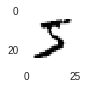

In [11]:
import matplotlib.pyplot as plt
digit_0 = train_images_original[0]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [12]:
print("digit_0.shape ",digit_0.shape)
print("label0 ",train_labels_original[0])

digit_0.shape  (28, 28)
label0  5


### Preparing the image data

In [13]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print("train_images.shape ", train_images.shape)
print("train_images_original.shape ", train_images_original.shape)



train_images.shape  (60000, 784)
train_images_original.shape  (60000, 28, 28)


## Problem 1 Explore

Use logistic regression with mean squared error loss.

In [14]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]

print("train_images_b.shape ", train_images_b.shape)
print("train_labels_original.shape ",train_labels_original.shape)

# fix initial random weight for 
# - mini-batch gradient descent
np.random.seed(42)
initial_weight = np.random.randn(n+1, 1) 
print("initial_weight.shape ",initial_weight.shape)

train_images_b.shape  (60000, 785)
train_labels_original.shape  (60000,)
initial_weight.shape  (785, 1)


### 0 Classifier create a 0 classifier first

train_labels_0.shape  (60000,)


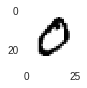

In [15]:
train_labels_0=(train_labels_original==0)
train_labels_0=train_labels_0.astype('int')
print("train_labels_0.shape ",train_labels_0.shape)

initial_weight=np.zeros((n+1, 1))
train_labels_0=train_labels_0.reshape(m,1)
digit_0 = train_images_original[1]
plt.figure(figsize=(1,1))
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [17]:
# number of epochs
epochs = 20
# learning rate
lr = 0.001
weight = initial_weight
batch_size = 64

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_0[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=sigmoid(z)
        da=(a -yi)
        dz=da*a*(1-a)
        gradient = 1/batch_size * xi.T.dot(dz)
        weight = weight - lr * gradient


y_predict = sigmoid(train_images_b[1].dot(weight))                  
print("score for a 0 example ", y_predict)
print("Is 0?", y_predict>0.6)

score for a 0 example  [0.84862049]
Is 0? [ True]


### Train 10 classifiers that perform binary classification¶

In [18]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

print(train_labels.shape)
print(train_labels.dtype)

(60000, 10)
float32


In [0]:
def my_own_categoricalv3 (train_labels_original):
  train_labels_i=np.zeros((train_labels_original.shape[0],10))
  for i in range(0,9):

    train_labels_i_temp=train_labels_original==i
    train_labels_i_temp=train_labels_i_temp.astype('float32')
    train_labels_i[:,i]=train_labels_i_temp
  return train_labels_i

In [20]:
train_labels_i=my_own_categorical(train_labels_original)
#test
train_labels==train_labels_i
weight_i=np.zeros((train_images_b.shape[1],10))
print("weight_i.shape ",weight_i.shape)
print("initial_weight.shape ",initial_weight.shape)

weight_i.shape  (785, 10)
initial_weight.shape  (785, 1)


In [0]:
lr=0.001
features=initial_weight.shape[0]
weight_i=np.zeros((features,10))

for dig in range(0,10):
  weight = initial_weight
  for epoch in range(epochs):
      shuffled_indices = np.random.permutation(m)
      train_images_b_shuffled = train_images_b[shuffled_indices]
      y_shuffled = train_labels_i[:,dig][shuffled_indices]
      y_shuffled=y_shuffled.reshape(m,1)
      for i in range(0, m, batch_size):
          xi = train_images_b_shuffled[i:i+batch_size,:]
          yi = y_shuffled[i:i+batch_size,:]
          z=xi.dot(weight)
          a=sigmoid(z)
          da=(a-yi)
          dz=da*a*(1-a)
          
          gradient = 1/batch_size * xi.T.dot(dz)
          weight = weight - lr * gradient
  
  weight_i[:,dig]=weight.reshape(features)

###Evaluate predictions


[0.84852268 0.02423489 0.06379173 0.08225334 0.03186063 0.17802399
 0.09224523 0.06611184 0.07608448 0.05540466]
(10,)
Predicted value  0
Real value 0


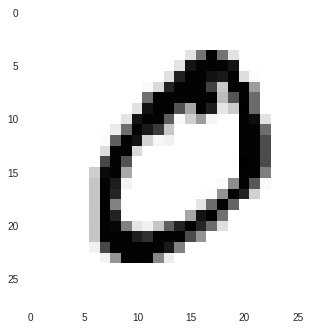

In [23]:
y_predict = sigmoid(train_images_b[1].dot(weight_i))                  
print(y_predict)
print(y_predict.shape)
print("Predicted value ", np.argmax(y_predict))
print("Real value", train_labels_original[1])
digit_0 = train_images_original[1]
plt.imshow(digit_0)
plt.grid(None)
plt.show()

In [24]:
# Train accuracy
m=train_labels_original.shape[0]

predicted_labels_raw=sigmoid(train_images_b.dot(weight_i))  
print(predicted_labels_raw.shape)
predicted_labels=np.argmax(predicted_labels_raw,axis=1)
print(predicted_labels.shape)
print(train_labels_original.shape)
predicted_labels = predicted_labels.astype('uint8')
train_labels_original=train_labels_original.astype('uint8')

wrong_indices = [i for i in range(m) if predicted_labels[i] != train_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_train=1.0 - len(wrong_indices) / m
print("Train accuracy= ", acc_train)

(60000, 10)
(60000,)
(60000,)
Train accuracy=  0.7928


In [26]:
# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=sigmoid(test_images_b.dot(weight_i))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test accuracy= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test accuracy=  0.8038


## Problem 1 Final solution --Use logistic regression with mean squared error loss.

In [45]:
#Train
# load the data , adding bias
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
#Use one hot encode
Y=my_own_categorical(train_labels_original)
# create a weight matrix, to save each of the 10 classifiers all in one matrix
Wi = np.zeros((train_images_b.shape[1],10))

#Train the 10 digit classifiers
for dig in range(10):
  print("Digit ", dig)
  Wi[:,dig] = train_model_se(train_images_b, Y[:,dig].reshape(-1,1), 0.01, 64, 10).reshape(train_images_b.shape[1],)


Digit  0
train model se
Epoch  9  Loss = 0.008188595697889657
Digit  1
train model se
Epoch  9  Loss = 0.007572666606173217
Digit  2
train model se
Epoch  9  Loss = 0.015286626168339972
Digit  3
train model se
Epoch  9  Loss = 0.017118282804188017
Digit  4
train model se
Epoch  9  Loss = 0.014018825865402953
Digit  5
train model se
Epoch  9  Loss = 0.020700299471257854
Digit  6
train model se
Epoch  9  Loss = 0.01018965232029039
Digit  7
train model se
Epoch  9  Loss = 0.011021169284100732
Digit  8
train model se
Epoch  9  Loss = 0.027291575411390344
Digit  9
train model se
Epoch  9  Loss = 0.02325782300814567


In [46]:
#Evaluation independent, for each digit using th =0.6
for i in range (10):
  Y_predicted = (forward_sigmoid(test_images_b, Wi[:,i].reshape(test_images_b.shape[1],-1))>0.6)
  accuracy = np.sum((Y_predicted == (test_labels_original == i).reshape(-1,1)))/test_labels_original.shape[0]
  print ("Digit ", i, "Accuracy", accuracy)


# Evaluation total
predicted_labels_testw=np.argmax(forward_sigmoid(test_images_b,Wi),axis=1).astype('uint8')
acc_test=sum(predicted_labels_testw==test_labels_original)/test_labels_original.shape[0]
print("Total Test accuracy= ",acc_test)

# or
#wrong_indices_test = [i for i in range(test_images_b.shape[0]) if predicted_labels_test[i] != test_labels_original[i]]
#acc_test=1.0 - len(wrong_indices_test) / test_images_b.shape[0]


Digit  0 Accuracy 0.9845
Digit  1 Accuracy 0.9861
Digit  2 Accuracy 0.9607
Digit  3 Accuracy 0.9598
Digit  4 Accuracy 0.963
Digit  5 Accuracy 0.9459
Digit  6 Accuracy 0.9757
Digit  7 Accuracy 0.9729
Digit  8 Accuracy 0.9289
Digit  9 Accuracy 0.9407
Total Test accuracy=  0.8738


## Problem 2 Explore

Use logistic regression with binary cross entropy loss.




In [0]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]


# fix initial random weight for 
# - mini-batch gradient descent
np.random.seed(42)
initial_weight = np.random.randn(n+1, 1) 

### 0 Classifier  create a 0 classifier first

In [49]:
train_labels_0=train_labels_original==0
train_labels_0=train_labels_0.astype('int')
train_labels_0=train_labels_0.reshape(m,1)
train_labels_0

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [0]:
# number of epochs
epochs = 20
# learning rate
lr = 0.01
weight = initial_weight
batch_size = 64

for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_0[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=sigmoid(z)
        gradient = 1/batch_size * xi.T.dot(a -yi)
        weight = weight - lr * gradient


y_predict = sigmoid(train_images_b[1].dot(weight))                  
y_predict 

array([0.99999102])

### Train 10 classifiers that perform binary classification

In [0]:
train_labels_i=np.zeros((m,10))
for i in range(0,9):
  
  train_labels_i_temp=train_labels_original==i
  train_labels_i_temp=train_labels_i_temp.astype('int')
  train_labels_i[:,i]=train_labels_i_temp

print("train_labels_i.shape ",train_labels_i.shape)
train_labels_i

weight_i=np.zeros((features,10))
print("weight_i.shape ",weight_i.shape)
print("initial_weight.shape ",initial_weight.shape)

train_labels_i.shape  (60000, 10)
weight_i.shape  (785, 10)
initial_weight.shape  (785, 1)


In [0]:
features=initial_weight.shape[0]
weight_i=np.zeros((features,10))

for dig in range(0,10):
  weight = initial_weight
  for epoch in range(epochs):
      shuffled_indices = np.random.permutation(m)
      train_images_b_shuffled = train_images_b[shuffled_indices]
      y_shuffled = train_labels_i[:,dig][shuffled_indices]
      y_shuffled=y_shuffled.reshape(m,1)
      for i in range(0, m, batch_size):
          xi = train_images_b_shuffled[i:i+batch_size,:]
          yi = y_shuffled[i:i+batch_size,:]
          z=xi.dot(weight)
          a=sigmoid(z)
          gradient = 1/batch_size * xi.T.dot(a -yi)
          weight = weight - lr * gradient
  
  weight_i[:,dig]=weight.reshape(features)
  



### Evaluate predictions

In [0]:
y_predict = sigmoid(train_images_b[1].dot(weight_i))                  
print(y_predict)
print(y_predict.shape)
print("Prediction ", np.argmax(y_predict))
print("Real ", train_labels_original[1])


[9.99989021e-01 8.99393648e-14 2.02758138e-05 6.63176426e-05
 2.90132861e-11 3.80585527e-04 1.23040999e-06 5.84885858e-08
 9.09319506e-05 1.28432025e-14]
(10,)
Prediction  0
Real  0


In [0]:
# Train accuracy
m=train_labels_original.shape[0]

predicted_labels_raw=sigmoid(train_images_b.dot(weight_i))  
print(predicted_labels_raw.shape)
predicted_labels=np.argmax(predicted_labels_raw,axis=1)
print(predicted_labels.shape)
print(train_labels_original.shape)
predicted_labels = predicted_labels.astype('uint8')
train_labels_original=train_labels_original.astype('uint8')

wrong_indices = [i for i in range(m) if predicted_labels[i] != train_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_train=1.0 - len(wrong_indices) / m
print("Train acc= ", acc_train)

(60000, 10)
(60000,)
(60000,)
Train acc=  0.8255833333333333


In [0]:
# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=sigmoid(test_images_b.dot(weight_i))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8296


7
2


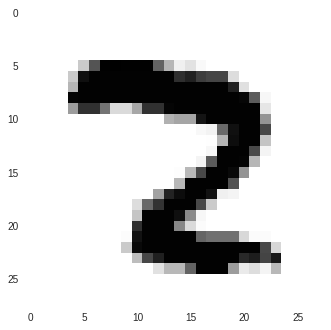

In [0]:
# This show the ith misclassified digit. 
i = 4
wrong_index = wrong_indices[i]

print(predicted_labels[wrong_index])
print(train_labels_original[wrong_index])
plt.imshow(train_images_original[wrong_index])
plt.grid(None)
plt.show()

## Problem 2  Final Solution  --Use logistic regression with binary cross entropy loss.

In [50]:
#Train
# load the data , adding bias
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
#Use one hot encode
Y=my_own_categorical(train_labels_original)
# create a weight matrix, to save each of the 10 classifiers all in one matrix
Wi = np.zeros((train_images_b.shape[1],10))
#Train the 10 digit classifiers
for i in range(10):
  print("Digit ", i)
  Wi[:,i] = train_model_ce(train_images_b, Y[:,i].reshape(-1,1), 0.01, 64, 10).reshape(train_images_b.shape[1],)
  


Digit  0
train model ce
Epoch  9  Loss = 0.04195797193696019
Digit  1
train model ce
Epoch  9  Loss = 0.040182475161397196
Digit  2
train model ce
Epoch  9  Loss = 0.08653124898938439
Digit  3
train model ce
Epoch  9  Loss = 0.10055632266295503
Digit  4
train model ce
Epoch  9  Loss = 0.07101065385409575
Digit  5
train model ce
Epoch  9  Loss = 0.11289626254502055
Digit  6
train model ce
Epoch  9  Loss = 0.05371325877894649
Digit  7
train model ce
Epoch  9  Loss = 0.06136564965533448
Digit  8
train model ce
Epoch  9  Loss = 0.15139304294179257
Digit  9
train model ce
Epoch  9  Loss = 0.12337392607122807


In [51]:

#Evaluation independent
for i in range (10):
  Y_predicted = (forward_sigmoid(test_images_b, Wi[:,i].reshape(test_images_b.shape[1],-1))>0.6)
  accuracy = np.sum((Y_predicted == (test_labels_original == i).reshape(-1,1)))/test_labels_original.shape[0]
  print ("Digit ", i, "Accuracy", accuracy)


# Evaluation total
predicted_labels_testw=np.argmax(forward_sigmoid(test_images_b,Wi),axis=1).astype('uint8')
acc_test=sum(predicted_labels_testw==test_labels_original)/test_labels_original.shape[0]
print("Total Test accuracy= ",acc_test)

Digit  0 Accuracy 0.9902
Digit  1 Accuracy 0.9907
Digit  2 Accuracy 0.9745
Digit  3 Accuracy 0.971
Digit  4 Accuracy 0.9746
Digit  5 Accuracy 0.9629
Digit  6 Accuracy 0.9834
Digit  7 Accuracy 0.9812
Digit  8 Accuracy 0.9477
Digit  9 Accuracy 0.9581
Total Test accuracy=  0.9006


## Problem 3 Explore

- Load the training and test data using Keras, no validation set needed.
- Create network with an input layer consisting of 28 x 28 input neurons and an output layer consisting of 10 output neurons.
- Use softmax and categorical cross entropy loss.
- Implement mini-batch stochastic gradient descent using only numpy, that is, you are not allowed to use TensorFlow/Keras for SGD.

In [52]:
# add bias to each instance
m,n=train_images.shape
train_images_b = np.c_[np.ones((m, 1)), train_images]


train_labels_i=my_own_categorical(train_labels_original)

np.random.seed(42)
initial_weight = np.random.randn(n+1,10) 
print("initial_weight.shape ",initial_weight.shape)
print(initial_weight)

initial_weight.shape  (785, 10)
[[ 0.49671415 -0.1382643   0.64768854 ...  0.76743473 -0.46947439
   0.54256004]
 [-0.46341769 -0.46572975  0.24196227 ...  0.31424733 -0.90802408
  -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  ...  0.37569802 -0.60063869
  -0.29169375]
 ...
 [ 0.59899634  0.85334898 -0.49419002 ... -0.22093172  0.19112423
  -1.14970747]
 [-0.19360951  0.7445864   0.64194713 ... -0.07782144 -0.27595145
  -0.36172384]
 [-0.06289387 -0.44787764  0.65814304 ...  0.06970427 -0.65065662
  -0.32664756]]


In [0]:
def softmaxv2(z):
  z_exp=np.exp(z-np.max(z))
  #rint(z_exp.shape)
  #rint(z_exp)
  total=np.sum(z_exp,axis=1)
  #rint(total.shape)
  #rint(total)
  return z_exp/total.reshape(z_exp.shape[0],1)

In [0]:
def softmaxv3(z):
  z_exp=np.exp(z-np.max(z))
  #rint(z_exp.shape)
  #rint(z_exp)
  total=np.sum(z_exp)
  #rint(total.shape)
  #rint(total)
  return z_exp/total

In [0]:
test=np.random.randn(12,4) 
test.dtype
a=softmax(test)
#print(a)
#print(np.sum(a,axis=1))

In [0]:
o=np.ones((3,3))-np.arange(3)
#print(o)
ii=np.eye(3)
#print(ii)

In [0]:
train_labels_i=my_own_categorical(train_labels_original)
initial_weight=np.zeros((train_images_b.shape[1],10))
# number of epochs
epochs = 20
# learning rate
lr = 0.001
weight = initial_weight
batch_size = 40

dz=np.zeros((batch_size,10))
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    train_images_b_shuffled = train_images_b[shuffled_indices]
    y_shuffled = train_labels_i[shuffled_indices]
   
    for i in range(0, m, batch_size):
        xi = train_images_b_shuffled[i:i+batch_size,:]
        yi = y_shuffled[i:i+batch_size,:]
        z=xi.dot(weight)
        a=softmax(z)
        #for j in range(0,batch_size):
          #ytemp=y_shuffled[j,:]
          #print(ytemp.shape)
          #difftemp=(a[j,:].reshape(1,10)-np.eye(10))
          #print(difftemp.shape)
          
          #dz[j,:]=ytemp.reshape(1,10).dot(difftemp)
        dz= (a - yi) 
        gradient = 1/batch_size * xi.T.dot(dz)
        weight = weight - lr * gradient

 

In [0]:
y_predict = softmaxv3(train_images_b[1].dot(weight))                  
y_predict

array([9.92642898e-01, 3.95224933e-06, 1.84828158e-04, 4.39405941e-04,
       8.26985697e-06, 5.85298617e-03, 2.93359016e-04, 1.62698961e-04,
       2.97437028e-04, 1.14164806e-04])

In [0]:


# Test accuracy
mt=test_labels_original.shape[0]

#m,n=test_images.shape

test_images_b = np.c_[np.ones((mt, 1)), test_images]

predicted_labels_test_raw=softmax(test_images_b.dot(weight))  
print(predicted_labels_test_raw.shape)
predicted_labels_test=np.argmax(predicted_labels_test_raw,axis=1)
print(predicted_labels_test.shape)
print(test_labels_original.shape)
predicted_labels_test = predicted_labels_test.astype('uint8')
test_labels_original=test_labels_original.astype('uint8')

wrong_indices_test = [i for i in range(mt) if predicted_labels_test[i] != test_labels_original[i]]
# The quantity below is equal to the test accuracy reported by the network fit method.
acc_test=1.0 - len(wrong_indices_test) / mt
print("Test acc= ",acc_test)
             

(10000, 10)
(10000,)
(10000,)
Test acc=  0.8932


## Problem 3 Final Solution --Use softmax and categorical cross entropy loss.

In [70]:
#Train
# load the data , adding bias
train_images_b, train_labels_original, test_images_b, test_labels_original=load_data()
#Use one hot encode
Y=my_own_categorical(train_labels_original)

W= train_model_cc(train_images_b, Y, 0.01, 64, 10)

train model cc
Epoch  0  Loss = 0.6243326458556628
Epoch  1  Loss = 0.4990935532128692
Epoch  2  Loss = 0.4480792667106013
Epoch  3  Loss = 0.4186756495966363
Epoch  4  Loss = 0.39898858895728295
Epoch  5  Loss = 0.3844089297362303
Epoch  6  Loss = 0.3731993160298413
Epoch  7  Loss = 0.3643318723974797
Epoch  8  Loss = 0.35707386350204207
Epoch  9  Loss = 0.3508354150634164
Epoch  9  Final Loss = 0.3508354150634164


In [71]:
#Evaluation


# Evaluation total
predicted_labels_testw=np.argmax(forward_sigmoid(test_images_b,Wi),axis=1).astype('uint8')
acc_test=sum(predicted_labels_testw==test_labels_original)/test_labels_original.shape[0]
print("Total Test accuracy= ",acc_test)


Total Test accuracy=  0.9006


##Loading the MNIST digits data set, and implement functions for P4,P5

In [0]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras import models
from keras import layers

import numpy as np

In [0]:
def load_data_no_b():
  (train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
  train_images = train_images_original.reshape(train_images_original.shape[0], -1)/255
  #train_images = train_images.astype('float32') / 255

  test_images = test_images_original.reshape(test_images_original.shape[0], -1)/255
  #test_images = test_images.astype('float32') / 255
  
  
  return train_images, train_labels_original, test_images, test_labels_original

def Safe(r,c, i, j, visited,im): 
  return (i >= 0 and i < r and 
            j >= 0 and j < c and 
            not visited[i][j] and im[i][j]) 
def DFS(r,c,i, j, visited,im): 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    visited[i][j] = True
    for k in range(8): 
        if Safe(r,c,i + rowNbr[k], j + colNbr[k], visited,im): 
            DFS(r,c,i + rowNbr[k], j + colNbr[k], visited,im) 

def countCC(r,c,im): 

    visited = [[False for j in range(c)]for i in range(r)] 
    count = 0
    for i in range(r): 
        for j in range(c): 
            if visited[i][j] == False and im[i][j] ==1: 
                DFS(r,c,i, j, visited,im) 
                count += 1

    return count 
  

def extra_features(train_images_b,test_images_b):
  
  row = 28 
  col = 28
  new_feature_w_region=np.zeros((train_images_b.shape[0],1))
  for i in range(0,train_images_b.shape[0]):
    new_feature_w_region[i,0]=countCC(row,col,1-train_images_b[i].reshape(( 28 ,28))) 

  new_feature_w_region_test=np.zeros((test_images_b.shape[0],1))
  for i in range(0,test_images_b.shape[0]):
    new_feature_w_region_test[i,0]=countCC(row,col,test_images_b[i].reshape(( 28 ,28))) 

  new_feature_w_region_n=new_feature_w_region/max(new_feature_w_region)
  new_feature_w_region_n_test=new_feature_w_region_test/max(new_feature_w_region_test)

  b_area=np.sum(train_images_b,axis=1)
  b_area_n=(b_area/max(b_area)).reshape((b_area.shape[0],1))
  w_area=28*28-b_area
  w_area_n=(w_area/max(w_area)).reshape((w_area.shape[0],1))

  train_images_ext=np.c_[b_area_n,w_area_n,new_feature_w_region_n,train_images_b]


  b_area_test=np.sum(test_images_b,axis=1)
  b_area_test_n=(b_area_test/max(b_area_test)).reshape((b_area_test.shape[0],1))
  w_area_test=28*28-b_area_test_n
  w_area_test_n=(w_area_test/max(w_area_test)).reshape((w_area_test.shape[0],1))

  test_images_ext=np.c_[b_area_test_n,w_area_test_n,new_feature_w_region_n_test,test_images_b]
  
  
  return train_images_ext, test_images_ext


def train_nn(train_images,train_labels,test_images, test_labels,batch_size=128, epochs = 10):
  num_features=3
  network = models.Sequential()
  network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28 +num_features,)))
  network.summary()

  network.compile(optimizer='sgd',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  
  history = network.fit(train_images, 
                        train_labels, 
                        epochs=epochs, 
                        batch_size=batch_size, 
                        validation_data=(test_images, test_labels))
  return history

## Problem 4 Explore

Reimplement the network from Problem 3 entirely in Keras.






### Preparing the labels

In [0]:

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [75]:
train_labels.shape

(60000, 10)

In [76]:
train_labels_original.shape

(60000,)

In [77]:
np.argmax(train_labels[0])

5

In [78]:
train_labels_original[0]

5

### The network architecture

In [79]:
network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
network.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### The compilation step

In [0]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### The training step

In [82]:
epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/step - loss: 1.2540 - acc: 0.7046 - val_loss: 0.8084 - val_acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.7135 - acc: 0.8398 - val_loss: 0.6085 - val_acc: 0.8601
Epoch 3/10
60000/60000 [==============================] - 1s 20us/step - loss: 0.5863 - acc: 0.8590 - val_loss: 0.5268 - val_acc: 0.8748
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.5248 - acc: 0.8687 - val_loss: 0.4811 - val_acc: 0.8812
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.4874 - acc: 0.8755 - val_loss: 0.4516 - val_acc: 0.8864
Epoch 6/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4616 - acc: 0.8804 - val_loss: 0.4298 - val_acc: 0.8895
Epoch 7/10
60000/60000 [==============================] - 1s 21us/step - loss: 0

### Display the training/test loss/accuracy

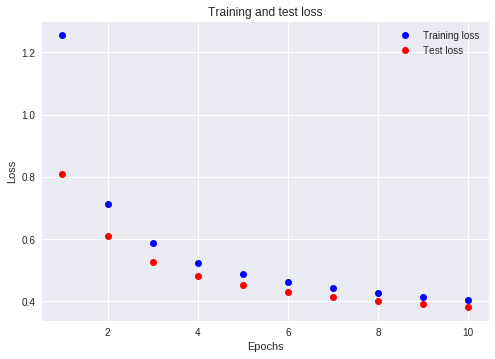

In [83]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

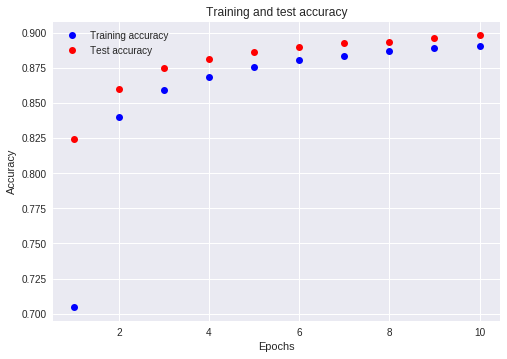

In [85]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Problem 4 Final Solution --Reimplement the network from Problem 3 entirely in Keras.

In [108]:
#Train
train_images, train_labels_original, test_images, test_labels_original=load_data_no_b()

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

network = models.Sequential()
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28,)))
network.summary()

network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images, test_labels))



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/step - loss: 1.2558 - acc: 0.7005 - val_loss: 0.8093 - val_acc: 0.8327
Epoch 2/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.7136 - acc: 0.8410 - val_loss: 0.6063 - val_acc: 0.8610
Epoch 3/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.5853 - acc: 0.8602 - val_loss: 0.5236 - val_acc: 0.8746
Epoch 4/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.5235 - acc: 0.8697 - val_loss: 0.4778 - val_acc: 0.8818
Epoch 5/10
60000/60000 [==============================] - 1s 22us/step

Final accuracy 0.898


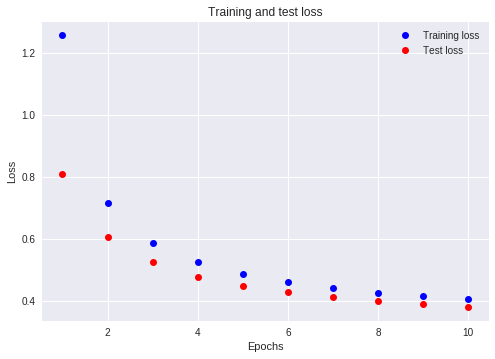

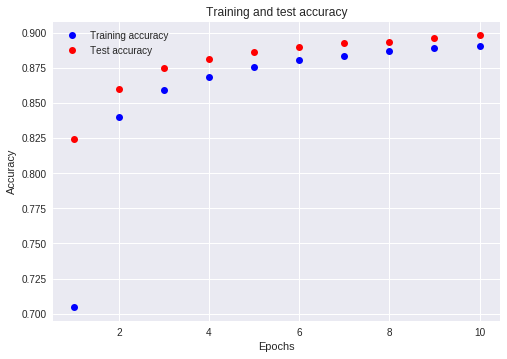

In [110]:
#Evaluation


history_dict = history.history
#print(history_dict['acc'])
print("Final accuracy",history_dict['val_acc'][epochs-1])


loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Problem 5

Extend the network from Problem 4 by adding new features.
- Round the grey values of the images to 1 and 0 so you obtain black and white images. Add as an additional feature the number of white regions. For instance, a typical 0 has 2 white regions and 8 has 3. Use the following neighborhoods for pixels:

```
pixel x,y (indicated by .) is connected to its neighbors (indicated by o):

 o
o.o  
 o
 
ooo
o.o
ooo
```
- Consider the width.
- Consider the height.
- Come up with other features.

You should normalize your new features so that they are at the same scale as the pixel values (between 0 and 1).

In [0]:
(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()
train_images = train_images_original.reshape((60000, 28 * 28))
train_images_b = (train_images.astype('float32') / 255 > 0.5)*1

test_images = test_images_original.reshape((10000, 28 * 28))
test_images_b = (test_images.astype('float32') / 255 > 0.5)*1
  

  
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)






A digit segmented


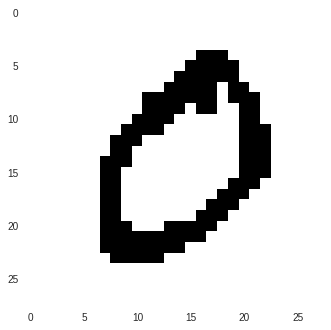

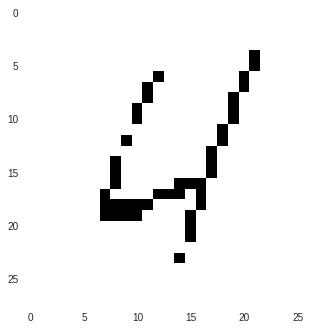

Digit  4 gray scale


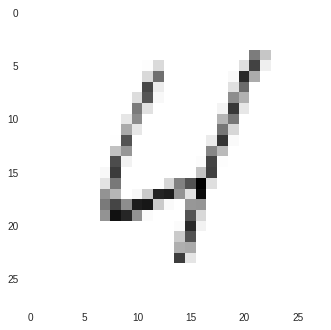

(784,)

In [90]:
#im = filters.threshold_otsu(train_images[0])
#print(train_images[0])
print("A digit segmented")
plt.imshow(train_images_b[1].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
plt.imshow(train_images_b[30198].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
print("Digit  4 gray scale")
plt.imshow(train_images[30198].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
train_images[0].shape

0 has No de connected components=  2
5 has No de connected components=  1


<function matplotlib.pyplot.show>

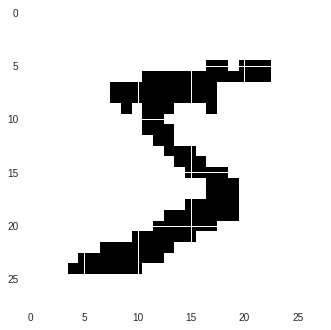

In [94]:
# compute # of connected commponets 
def Safe(r,c, i, j, visited,im): 
  return (i >= 0 and i < r and 
            j >= 0 and j < c and 
            not visited[i][j] and im[i][j]) 
def DFS(r,c,i, j, visited,im): 
    rowNbr = [-1, -1, -1,  0, 0,  1, 1, 1]; 
    colNbr = [-1,  0,  1, -1, 1, -1, 0, 1]; 

    visited[i][j] = True
    for k in range(8): 
        if Safe(r,c,i + rowNbr[k], j + colNbr[k], visited,im): 
            DFS(r,c,i + rowNbr[k], j + colNbr[k], visited,im) 

def countCC(r,c,im): 

    visited = [[False for j in range(c)]for i in range(r)] 
    count = 0
    for i in range(r): 
        for j in range(c): 
            if visited[i][j] == False and im[i][j] ==1: 
                DFS(r,c,i, j, visited,im) 
                count += 1

    return count 
im=1-train_images[1].reshape(( 28 ,28))
row = len(im) 
col = len(im[0]) 
  

n_cc= countCC(row,col,1-train_images_b[1].reshape(( 28 ,28))) 
print("0 has No de connected components= ",n_cc)
plt.imshow(train_images_b[1].reshape((28,28)))
plt.show

n_cc= countCC(row,col,1-train_images_b[0].reshape(( 28 ,28))) 
print("5 has No de connected components= ",n_cc)
plt.imshow(train_images_b[0].reshape((28,28)))
plt.show

In [0]:
m,n=train_images_b.shape
new_feature_w_region=np.zeros((m,1))
for i in range(0,m):
  new_feature_w_region[i,0]=countCC(row,col,1-train_images_b[i].reshape(( 28 ,28))) 

[[1.]
 [2.]
 [1.]
 ...
 [1.]
 [1.]
 [3.]]
(60000, 1)
[5.]
[[0.2]
 [0.4]
 [0.2]
 ...
 [0.2]
 [0.2]
 [0.6]]
7290


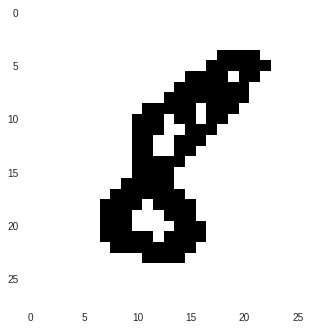

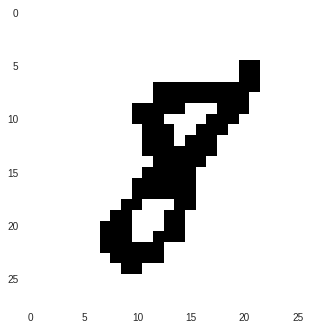

3


In [96]:
new_feature_w_region.shape
print(new_feature_w_region)
print(new_feature_w_region.shape)
print(max(new_feature_w_region))
new_feature_w_region_n=new_feature_w_region/max(new_feature_w_region)
print(new_feature_w_region_n)
ind=np.argmax(new_feature_w_region)
print(ind)
plt.imshow(train_images_b[ind].reshape(( 28 ,28)))
plt.grid(None)
plt.show()

eight=train_labels_original==8
ind_8=np.argmax(eight)
plt.imshow(train_images_b[ind_8].reshape(( 28 ,28)))
plt.grid(None)
plt.show()
cc_8=countCC(row,col,1-train_images_b[ind_8].reshape(( 28 ,28))) 
print(cc_8)

In [0]:
#train_images_ext=np.c_[new_feature_w_region_n,train_images_b]
#train_images_ext.shape

m,n=test_images_b.shape
new_feature_w_region_test=np.zeros((m,1))
for i in range(0,m):
  new_feature_w_region_test[i,0]=countCC(row,col,test_images_b[i].reshape(( 28 ,28))) 
  
new_feature_w_region_n_test=new_feature_w_region_test/max(new_feature_w_region_test)
#test_images_ext=np.c_[new_feature_w_region_n_test,test_images_b]

In [98]:
b_area=np.sum(train_images_b,axis=1)
b_area.shape
print(b_area)
b_area_n=(b_area/max(b_area)).reshape((b_area.shape[0],1))
w_area=28*28-b_area
w_area_n=(w_area/max(w_area)).reshape((w_area.shape[0],1))
print(w_area.shape)
print(b_area.shape)
print(w_area)

train_images_ext=np.c_[b_area_n,w_area_n,new_feature_w_region_n,train_images_b]
train_images_ext.shape

[111 125  81 ...  86  85  82]
(60000,)
(60000,)
[673 659 703 ... 698 699 702]


(60000, 787)

In [99]:
b_area_test=np.sum(test_images_b,axis=1)
b_area_test_n=(b_area_test/max(b_area_test)).reshape((b_area_test.shape[0],1))
w_area_test=28*28-b_area_test_n
w_area_test_n=(w_area_test/max(w_area_test)).reshape((w_area_test.shape[0],1))

test_images_ext=np.c_[b_area_test_n,w_area_test_n,new_feature_w_region_n_test,test_images_b]
test_images_ext.shape

(10000, 787)

In [100]:
num_features=3
network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28 +num_features,)))
network.add(layers.Dense(10, activation='softmax', input_shape=(28 * 28 +num_features,)))
network.summary()
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 15
history = network.fit(train_images_ext, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(test_images_ext, test_labels))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7880      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 24us/step - loss: 1.2659 - acc: 0.6826 - val_loss: 0.7976 - val_acc: 0.8212
Epoch 2/15
60000/60000 [==============================] - 1s 21us/step - loss: 0.7070 - acc: 0.8334 - val_loss: 0.6018 - val_acc: 0.8553
Epoch 3/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.5823 - acc: 0.8555 - val_loss: 0.5235 - val_acc: 0.8695
Epoch 4/15
60000/60000 [==============================] - 1s 20us/step - loss: 0.5224 - acc: 0.8663 - val_loss: 0.4804 - val_acc: 0.8756
Epoch 5/15
60000/60000 [==============================] - 1s 20us/step

## Problem 5 Final Solution --Extend the network from Problem 4 by adding new features.

In [0]:
#Train
#Load data
train_images, train_labels_original, test_images, test_labels_original=load_data_no_b()

# one hot encode
train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

# get extra features, connected components, area black and area white.
train_images_ext,test_images_ext= extra_features(train_images,test_images)


In [113]:
#Train the NN using the extra features
history=train_nn(train_images_ext,train_labels,test_images_ext, test_labels,64,10)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                7880      
Total params: 7,880
Trainable params: 7,880
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.9843 - acc: 0.7756 - val_loss: 0.5988 - val_acc: 0.8666
Epoch 2/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.5518 - acc: 0.8657 - val_loss: 0.4739 - val_acc: 0.8848
Epoch 3/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.4716 - acc: 0.8785 - val_loss: 0.4234 - val_acc: 0.8903
Epoch 4/10
60000/60000 [==============================] - 2s 29us/step - loss: 0.4324 - acc: 0.8858 - val_loss: 0.3954 - val_acc: 0.8959
Epoch 5/10
60000/60000 [==============================] - 2s 29us/step

Final accuracy 0.9097


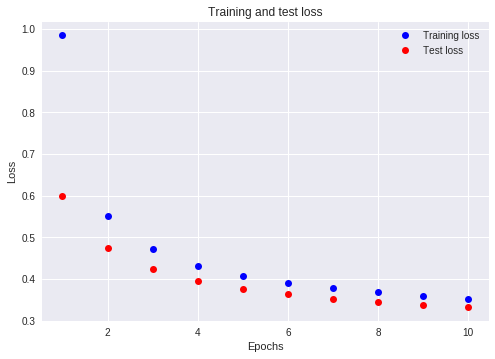

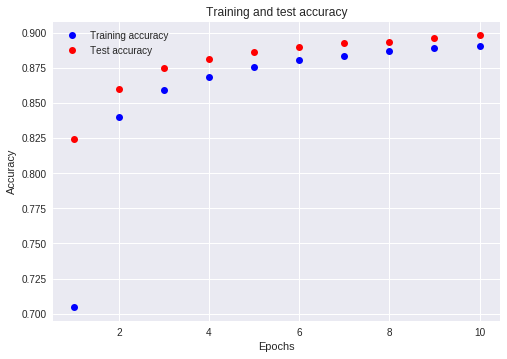

In [114]:
#Evaluation


history_dict = history.history
#print(history_dict['acc'])
print("Final accuracy",history_dict['val_acc'][epochs-1])


loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()